# TP5: Decision trees & random forests
The aim of this tutorial is to get familiar with the use of decision trees and their generalizations on simple examples using `scikit-learn` tools.

## Completing your installation first
You will need to install packages `python-graphviz` first. If needed, uncomment the `conda` command below:

In [1]:
# If needed, uncomment the line below:
# pip install graphviz

In [41]:
from pylab import *
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris, load_wine
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
import graphviz 
import pandas as pd
import random

rng_seed = np.random.seed(0)

import warnings
warnings.filterwarnings("ignore")

The data for this tutorial is famous. Called, **the iris dataset**, it contains four variables measuring various parts of iris flowers of three related species, and then a fourth variable with the species name. The reason it is so famous in machine learning and statistics communities is because the data requires very little preprocessing (i.e. no missing values, all features are floating numbers, etc.).

In [3]:
iris = load_iris()

## Step 1: explore the data set
1. What is the structure of the object `iris` ?

2. Plot this dataset in a well chosen set of representations to explore the data.

--> Given that iris is a dictionary, we use the pandas library to tranform it into a DataFrame and explore the data in a well chosen set.

## Using `pandas` to manipulate the data
Pandas is great to manipulate data in a Microsoft Excel like way.

In [4]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
# Add a new column with the species names, this is what we are going to try to predict
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Step 2: create training and test sets

Create a new column that for each row, generates a random number between 0 and 1, and if that value is less than or equal to .75, then sets the value of that cell as True and false otherwise. This is a quick and dirty way of randomly assigning some rows to be used as the training data and some as the test data.

In [6]:
df['is_train'] = np.random.uniform(0, 1, len(df)) <= .75
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,is_train
0,5.1,3.5,1.4,0.2,setosa,True
1,4.9,3.0,1.4,0.2,setosa,True
2,4.7,3.2,1.3,0.2,setosa,True
3,4.6,3.1,1.5,0.2,setosa,True
4,5.0,3.6,1.4,0.2,setosa,True


In [7]:
# Create two new dataframes, one with the training rows, one with the test rows
train, test = df[df['is_train']==True], df[df['is_train']==False]

In [8]:
# Show the number of observations for the test and training dataframes
print('Number of observations in the training data:', len(train))
print('Number of observations in the test data:',len(test))

Number of observations in the training data: 118
Number of observations in the test data: 32


In [9]:
# Create a list of the feature column's names
features = df.columns[:4]

# View features
features

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [10]:
# train['species'] contains the actual species names. Before we can use it,
# we need to convert each species name into a digit. So, in this case there
# are three species, which have been coded as 0, 1, or 2.
y = pd.factorize(train['species'])[0]

## Step 3: Decision trees for the iris dataset
The method `tree.DecisionTreeClassifier()` from `scikit-learn` builds decision trees objects as follows:

In [11]:
clf = tree.DecisionTreeClassifier(random_state=rng_seed)
clf = clf.fit(train[features], y)

# Using the whole dataset you may use directly:
#clf = clf.fit(iris.data, iris.target)

The `export_graphviz` exporter supports a variety of aesthetic options, including coloring nodes by their class (or value for regression) and using explicit variable and class names if desired. Jupyter notebooks also render these plots inline automatically:

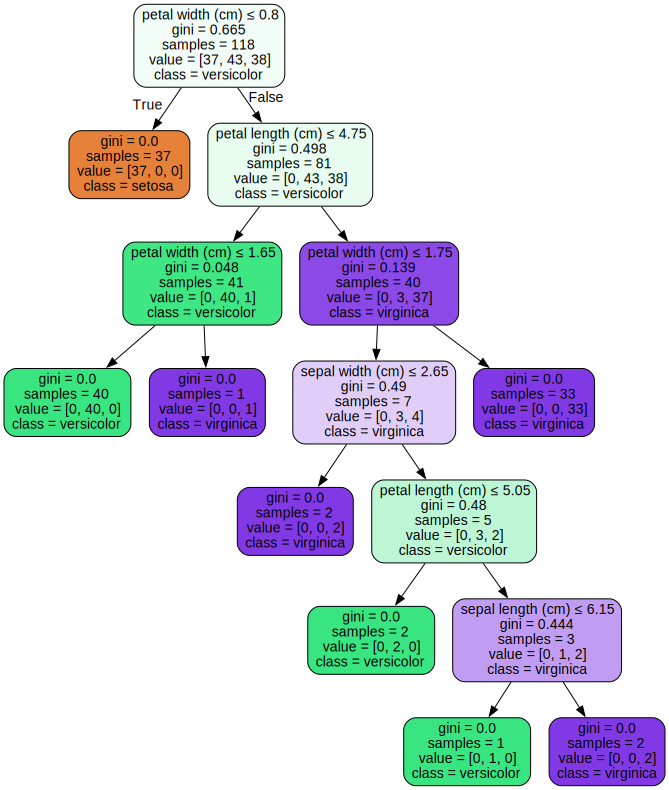

In [12]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=iris.feature_names,  
                         class_names=iris.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

We can also export the tree in Graphviz format and  savethe resulting graph in an output file iris.pdf:

In [13]:
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("iris") 

'iris.pdf'

After being fitted, **the model can then be used to predict the class of samples**:

In [14]:
class_pred = clf.predict(iris.data[:1, :])
class_pred

C:\Users\geyma\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

## Exercise 1
1. Train the decision tree on the iris dataset and explain how one should read blocks in `graphviz` representation of the tree.

2. Plot the regions of decision with the points of the training set superimposed.

*Indication: you may find the function `plt.contourf` useful.

<u>Réponse 1</u> : Pour entraîner l'arbre de décision sur les données du dataset Iris et les plots en utilisant Graphviz, on reprend les codes précédents :

In [15]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)
df['is_train'] = np.random.uniform(0, 1, len(df)) <= .75
train, test = df[df['is_train']==True], df[df['is_train']==False]
y = pd.factorize(train['species'])[0]
clf = tree.DecisionTreeClassifier(random_state=rng_seed)
clf = clf.fit(train[features], y)
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=iris.feature_names,  
                         class_names=iris.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)

<b>Explication</b> : Un arbre de décision se compose de noeuds (carrés intermédiaires) et de feuilles (carrés en bout de chaîne). Chaque noeud comporte l'information relative à une décision. Si toutes les informations du noeud sont respectées, on passe au noeud enfant suivant la flèche True, sinon on passe au noeud enfant suivant la flèche False. Cela permet en bout de course d'arriver à une feuille qui comporte l'information de la décision prise par l'arbre au final.

<u>Réponse 2</u> : On dessine les frontières de décision (entre chaque paire d'attributs) relative à l'arbre de décision entraîné précédemment.

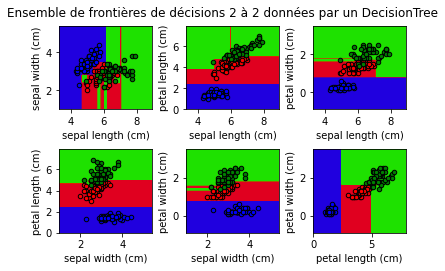

In [16]:
from sklearn.inspection import DecisionBoundaryDisplay
from itertools import combinations

attr = list(combinations(df.columns[:-2], 2))
attr = list(map(list, attr)) # List of all pairs of attributes in the iris dataset

for i, pair in enumerate(attr):
    X = df[pair].to_numpy()
    y = iris.target
    clf = tree.DecisionTreeClassifier(random_state=rng_seed).fit(X,y)
    
    ax = plt.subplot(2,3,i+1)
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)
    # Decision Boundaries
    DecisionBoundaryDisplay.from_estimator(clf, X, cmap = "brg", response_method="predict", ax=ax,
                                           xlabel=pair[0],
                                           ylabel=pair[1])    
    # Data Points
    for t, color in zip(range(3), "brg"):
        idx = np.where(t == y)
        plt.scatter(X[idx, 0],
                    X[idx, 1],
                    c = color,
                    cmap = "brg",
                    edgecolors="black",
                    s = 20)
        
plt.suptitle("Ensemble de frontières de décisions 2 à 2 données par un DecisionTree");

--------

## Exercise 2
1. Build 2 different trees based on a sepal features (sepal lengths, sepal widths) vs petal features (petal lengths, petal widths) only: which features are the most discriminant?

2. Compare performances with those obtained using all features.

3. Try the same as above using the various splitting criterion available, Gini's index, classification error or cross-entropy. Comment on your results. 

<u>Réponse 1</u> : On crée deux arbres de décision basés sur les attributs liés aux sépales et ceux liés aux pétales.

In [17]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)

df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)
df['is_train'] = np.random.uniform(0, 1, len(df)) <= .75
train, test = df[df['is_train']==True], df[df['is_train']==False]
y = pd.factorize(train['species'])[0]
y_true = pd.factorize(test['species'])[0]

In [18]:
features_sepal = ["sepal length (cm)", "sepal width (cm)"]
features_petal = ["petal length (cm)", "petal width (cm)"]

X_sepal = train[features_sepal]
clf_sepal = tree.DecisionTreeClassifier(random_state=rng_seed).fit(X_sepal, y)

X_petal = train[features_petal]
clf_petal = tree.DecisionTreeClassifier(random_state=rng_seed).fit(X_petal, y)

In [19]:
from sklearn.metrics import accuracy_score

y_pred_sepal = clf_sepal.predict(test[features_sepal])
y_pred_petal = clf_petal.predict(test[features_petal])
print(f"ACC (sepal) : {accuracy_score(y_true, y_pred_sepal)}")
print(f"ACC (petal) : {accuracy_score(y_true, y_pred_petal)}")

ACC (sepal) : 0.6571428571428571
ACC (petal) : 0.9714285714285714


In [20]:
from sklearn.metrics import accuracy_score

y_pred_sepal = clf_sepal.predict(test[features_sepal])
y_pred_petal = clf_petal.predict(test[features_petal])
print(f"ACC (sepal) : {accuracy_score(y_true, y_pred_sepal)}")
print(f"ACC (petal) : {accuracy_score(y_true, y_pred_petal)}")

ACC (sepal) : 0.6571428571428571
ACC (petal) : 0.9714285714285714


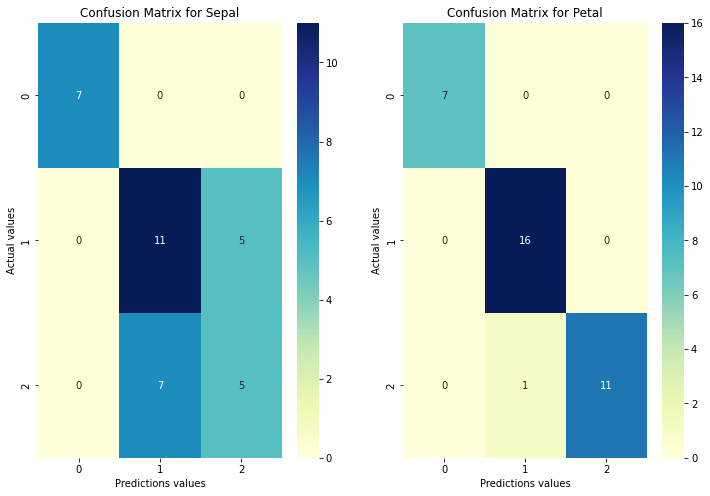

In [21]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

confusion_matrix_sepal = confusion_matrix(y_true, y_pred_sepal)
confusion_matrix_petal = confusion_matrix(y_true, y_pred_petal)
fig, ax = plt.subplots(1,2, figsize=(12,8))
sns.heatmap(confusion_matrix_sepal, ax=ax[0], annot=True, cmap="YlGnBu")
sns.heatmap(confusion_matrix_petal, ax=ax[1], annot=True, cmap="YlGnBu")

ax[0].set_title("Confusion Matrix for Sepal")
ax[0].set_xlabel("Predictions values")
ax[0].set_ylabel("Actual values")

ax[1].set_title("Confusion Matrix for Petal")
ax[1].set_xlabel("Predictions values")
ax[1].set_ylabel("Actual values");

On a estimé les performances des deux arbres de décision suivant les metrics d'accuracy et par la matrice de confusion.
- Accuracy : Les prédictions sont plus précises par l'arbre de décision sur les pétales (environ 95%) même si un tel résultat doit être pris en considérant que le jeu de données a assez peu d'échantillons
- Confusion matrix : Les résultats confirment l'accuracy avec des données bien prédites plus importantes lorsque l'on ne garde que les attributs liés aux pétales. On constate que les valeurs mal prédites lorsque l'on ne garde que les attributs liés aux sépales se répartissent sur la mauvaise prédiction entre Versicolour et Virginica

<u>Réponse 2</u> : Comparons les performances avec les performances de l'arbre de décision qui garde tous les attributs

ACC (all) : 0.9714285714285714


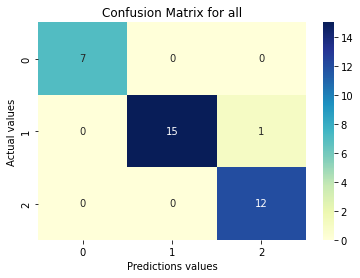

In [22]:
X = train.iloc[:, 0:4]
clf_all = tree.DecisionTreeClassifier(random_state=rng_seed).fit(X, y)

y_pred_all = clf_all.predict(test.iloc[:, 0:4])
print(f"ACC (all) : {accuracy_score(y_true, y_pred_all)}")
confusion_matrix_all = confusion_matrix(y_true, y_pred_all)
ax = plt.subplot(1,1,1)
sns.heatmap(confusion_matrix_all, ax=ax, annot=True, cmap="YlGnBu");

ax.set_title("Confusion Matrix for all")
ax.set_xlabel("Predictions values")
ax.set_ylabel("Actual values");

On constate qu'en utilisant l'ensemble du jeu de données les prédictions sont excellentes comme pour l'abre de décision liés simplement aux pétales
- ACC : Environ 97,1% (par rapport à 65,8% et 97,1%)
- Confusion Matrix : 1 erreur entre Versicolour et Virginica

<u>Réponse 3</u> : Changeons désormais le critère de décision pour comparer les performances

In [23]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)

df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)
df['is_train'] = np.random.uniform(0, 1, len(df)) <= .75
train, test = df[df['is_train']==True], df[df['is_train']==False]
y = pd.factorize(train['species'])[0]
y_true = pd.factorize(test['species'])[0]

In [24]:
features_sepal = ["sepal length (cm)", "sepal width (cm)"]
features_petal = ["petal length (cm)", "petal width (cm)"]

X_sepal = train[features_sepal]
clf_sepal = tree.DecisionTreeClassifier(criterion="entropy", random_state=rng_seed).fit(X_sepal, y)

X_petal = train[features_petal]
clf_petal = tree.DecisionTreeClassifier(criterion="entropy", random_state=rng_seed).fit(X_petal, y)

X = train.iloc[:, 0:4]
clf_all = tree.DecisionTreeClassifier(criterion="entropy", random_state=rng_seed).fit(X, y)

ACC (sepal) : 0.7741935483870968
ACC (petal) : 0.967741935483871
ACC (all) : 0.967741935483871


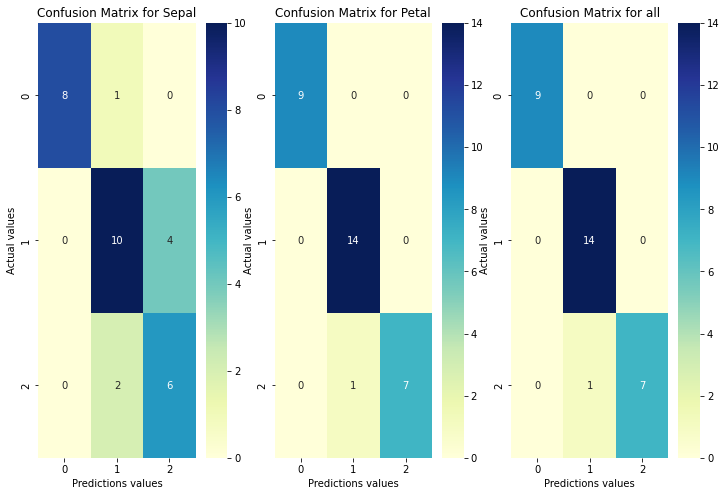

In [25]:
y_pred_sepal = clf_sepal.predict(test[features_sepal])
y_pred_petal = clf_petal.predict(test[features_petal])
y_pred_all = clf_all.predict(test.iloc[:, 0:4])
print(f"ACC (sepal) : {accuracy_score(y_true, y_pred_sepal)}")
print(f"ACC (petal) : {accuracy_score(y_true, y_pred_petal)}")
print(f"ACC (all) : {accuracy_score(y_true, y_pred_all)}")

confusion_matrix_sepal = confusion_matrix(y_true, y_pred_sepal)
confusion_matrix_petal = confusion_matrix(y_true, y_pred_petal)
confusion_matrix_all = confusion_matrix(y_true, y_pred_all)
fig, ax = plt.subplots(1,3, figsize=(12,8))
sns.heatmap(confusion_matrix_sepal, ax=ax[0], annot=True, cmap="YlGnBu")
sns.heatmap(confusion_matrix_petal, ax=ax[1], annot=True, cmap="YlGnBu")
sns.heatmap(confusion_matrix_all, ax=ax[2], annot=True, cmap="YlGnBu")

ax[0].set_title("Confusion Matrix for Sepal")
ax[0].set_xlabel("Predictions values")
ax[0].set_ylabel("Actual values")

ax[1].set_title("Confusion Matrix for Petal")
ax[1].set_xlabel("Predictions values")
ax[1].set_ylabel("Actual values");

ax[2].set_title("Confusion Matrix for all")
ax[2].set_xlabel("Predictions values")
ax[2].set_ylabel("Actual values");

In [26]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)

df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)
df['is_train'] = np.random.uniform(0, 1, len(df)) <= .75
train, test = df[df['is_train']==True], df[df['is_train']==False]
y = pd.factorize(train['species'])[0]
y_true = pd.factorize(test['species'])[0]

In [27]:
features_sepal = ["sepal length (cm)", "sepal width (cm)"]
features_petal = ["petal length (cm)", "petal width (cm)"]

X_sepal = train[features_sepal]
clf_sepal = tree.DecisionTreeClassifier(criterion="log_loss", random_state=rng_seed).fit(X_sepal, y)

X_petal = train[features_petal]
clf_petal = tree.DecisionTreeClassifier(criterion="log_loss", random_state=rng_seed).fit(X_petal, y)

X = train.iloc[:, 0:4]
clf_all = tree.DecisionTreeClassifier(criterion="log_loss", random_state=rng_seed).fit(X, y)

ACC (sepal) : 0.6363636363636364
ACC (petal) : 0.9696969696969697
ACC (all) : 0.9090909090909091


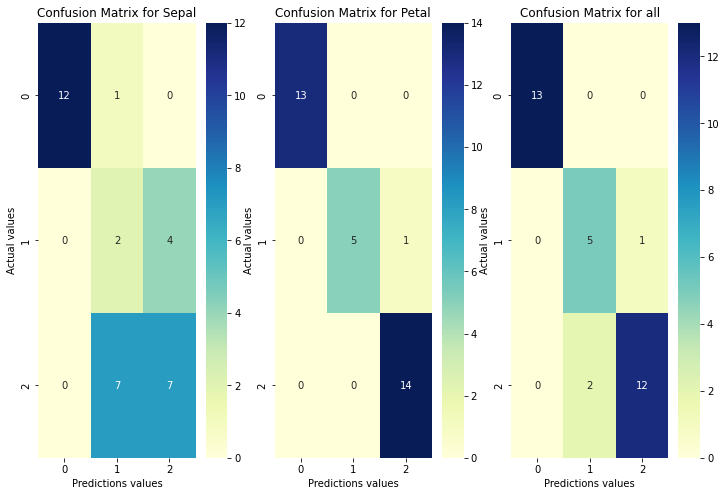

In [28]:
y_pred_sepal = clf_sepal.predict(test[features_sepal])
y_pred_petal = clf_petal.predict(test[features_petal])
y_pred_all = clf_all.predict(test.iloc[:, 0:4])
print(f"ACC (sepal) : {accuracy_score(y_true, y_pred_sepal)}")
print(f"ACC (petal) : {accuracy_score(y_true, y_pred_petal)}")
print(f"ACC (all) : {accuracy_score(y_true, y_pred_all)}")

confusion_matrix_sepal = confusion_matrix(y_true, y_pred_sepal)
confusion_matrix_petal = confusion_matrix(y_true, y_pred_petal)
confusion_matrix_all = confusion_matrix(y_true, y_pred_all)
fig, ax = plt.subplots(1,3, figsize=(12,8))
sns.heatmap(confusion_matrix_sepal, ax=ax[0], annot=True, cmap="YlGnBu")
sns.heatmap(confusion_matrix_petal, ax=ax[1], annot=True, cmap="YlGnBu")
sns.heatmap(confusion_matrix_all, ax=ax[2], annot=True, cmap="YlGnBu")

ax[0].set_title("Confusion Matrix for Sepal")
ax[0].set_xlabel("Predictions values")
ax[0].set_ylabel("Actual values")

ax[1].set_title("Confusion Matrix for Petal")
ax[1].set_xlabel("Predictions values")
ax[1].set_ylabel("Actual values");

ax[2].set_title("Confusion Matrix for all")
ax[2].set_xlabel("Predictions values")
ax[2].set_ylabel("Actual values");

On met tout sous forme de tableau pour résumer :

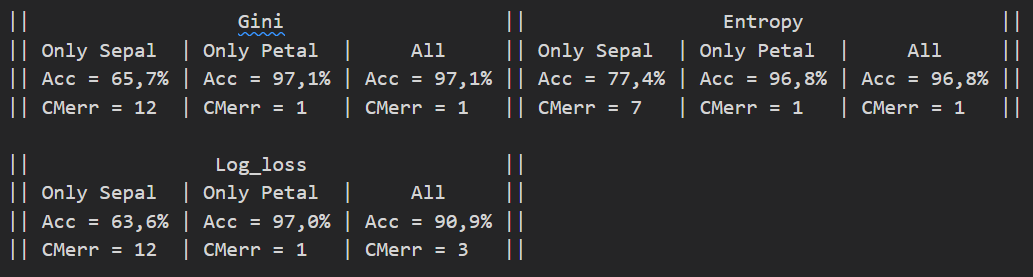

In [29]:
from IPython import display
display.Image("Summary_table.png")

On constate presque toujours une précision similaire entre le jeu de données réduit aux données de sépales et le jeu de données total.

### Going further ahead (not mandatory) 
Try the same approach adapted to another toy dataset from `scikit-learn` described at:
http://scikit-learn.org/stable/datasets/index.html

Play with another dataset available at:
http://archive.ics.uci.edu/ml/datasets.html

## Step 4: Random forests
Go to 

http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html 

for a documentation about the `RandomForestClassifier` provided by `scikit-learn`.

Since target values must be integers, we first need to transform labels into numbers as below.

In [30]:
# train['species'] contains the actual species names. Before we can use it,
# we need to convert each species name into a digit. So, in this case there
# are three species, which have been coded as 0, 1, or 2.
y = pd.factorize(train['species'])[0]

# View target
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [31]:
# Create a random forest Classifier. By convention, clf means 'Classifier'
rf = RandomForestClassifier(n_jobs=2, random_state=0)

# Train the Classifier to take the training features and learn how they relate
# to the training y (the species)
rf.fit(train[features], y)

RandomForestClassifier(n_jobs=2, random_state=0)

**Make predictions** and create actual english names for the plants for each predicted plant class:

In [32]:
preds = rf.predict(test[features])
preds_names = pd.Categorical.from_codes(preds, iris.target_names)
preds_names

['setosa', 'setosa', 'setosa', 'setosa', 'setosa', ..., 'virginica', 'virginica', 'virginica', 'virginica', 'virginica']
Length: 33
Categories (3, object): ['setosa', 'versicolor', 'virginica']

### Create a confusion matrix

In [33]:
# Create confusion matrix unsing pandas:
pd.crosstab(test['species'], preds, rownames=['Actual Species'], colnames=['Predicted Species'])

Predicted Species,0,1,2
Actual Species,,,
setosa,13,0,0
versicolor,0,5,1
virginica,0,0,14


## Feature selection using random forests byproducts

One of the interesting use cases for random forest is feature selection. One of the byproducts of trying lots of decision tree variations is that you can examine which variables are working best/worst in each tree.

When a certain tree uses one variable and another doesn't, you can compare the value lost or gained from the inclusion/exclusion of that variable. The good random forest implementations are going to do that for you, so all you need to do is know which method or variable to look at.

### View feature importance
While we don't get regression coefficients like with ordinary least squares (OLS), we do get a score telling us how important each feature was in classifying. This is one of the most powerful parts of random forests, because we can clearly see that petal width was more important in classification than sepal width.


In [34]:
# View a list of the features and their importance scores
list(zip(train[features], rf.feature_importances_))

[('sepal length (cm)', 0.08491096026312027),
 ('sepal width (cm)', 0.035294555798343515),
 ('petal length (cm)', 0.4598990276524132),
 ('petal width (cm)', 0.41989545628612296)]

## Exercise 3
1. Comment on the feature importances with respect to your previous observations on decision trees above.

2. Extract and visualize 5 trees belonging to the random forest using the attribute `estimators_` of the trained random forest classifier. Compare them. *Note that you may code a loop on extracted trees.*

3. Study the influence of parameters like `max_depth`, `min_samples_leaf` and `min_samples_split`. Try to optimize them and explain your approach and choices.

4. How is estimated the prediction error of a random forest ?
*Indication: have a look at parameter `oob_score`.*
What are out-of-bag samples ?

5. What should you do when classes are not balanced in the dataset ? (that is when there are much more examples of one class than another)

<u>Réponse 1</u> : A la lumière des résultats précédents, on se rend compte que les attributs liés aux pétales sont bien plus importants dans la classfication que les attributs liés aux sépales. Cela éclaire donc bien les résultats précédents qui montraient qu'un arbre de décision simplement sur les attributs liés aux pétales est déjà très efficace.

<u>Réponse 2</u> : On extrait puis on enregistre dans rf_results 5 arbres de décision de la Random Forest.

In [49]:
random.seed(10)
trees = random.sample(rf.estimators_, k=5)
for i, one_tree in enumerate(trees):
    dot_data = tree.export_graphviz(one_tree, out_file=None, 
                         feature_names=iris.feature_names,  
                         class_names=iris.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)  
    graph = graphviz.Source(dot_data)
    graph.render(f"rf_results/tree_{i}")
    y_pred = one_tree.predict(test.iloc[:, 0:4])
    print(f"ACC for tree_{i} = {accuracy_score(y_true, y_pred)}")

ACC for tree_0 = 0.9393939393939394
ACC for tree_1 = 0.9696969696969697
ACC for tree_2 = 0.9696969696969697
ACC for tree_3 = 0.9696969696969697
ACC for tree_4 = 0.9393939393939394


En particulier, calculons une forme de score pour chaque arbre sous la forme d'une somme noramlisée des scores d'importances calculés précédemment :
- Tree_0 : $\frac{2*0,46 + 3*0,42 + 2*0,08 + 2*0,035}{9} = \frac{2,41}{9} = 0,268$
- Tree_1 : $\frac{1*0,46 + 4*0,42 + 0*0,08 + 0*0,035}{5} = \frac{2,14}{5} = 0,428$
- Tree_2 : $\frac{3*0,46 + 1*0,42 + 0*0,08 + 1*0,035}{5} = \frac{1,835}{5} = 0,367$
- Tree_3 : $\frac{3*0,46 + 1*0,42 + 2*0,08 + 0*0,035}{6} = \frac{1,96}{6} = 0,327$
- Tree_4 : $\frac{0*0,46 + 3*0,42 + 0*0,08 + 1*0,035}{4} = \frac{1,295}{4} = 0,324$

Donc en termes d'"importance", les deux arbres ayant un score d'importance les plus faibles sont bien les arbres 0 et 4 qui sont ceux ayant une accuracy plus faible.

<u>Réponse 3</u> : Jouons avec les hyperparamètres.

In [50]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)

df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)
df['is_train'] = np.random.uniform(0, 1, len(df)) <= .75
train, test = df[df['is_train']==True], df[df['is_train']==False]
y = pd.factorize(train['species'])[0]
y_true = pd.factorize(test['species'])[0]

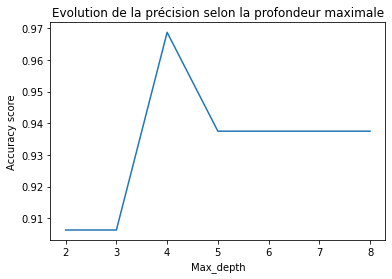

In [57]:
DEPTH = np.linspace(2,8,7).astype(int)
abs, ord = [], []
for max_depth in DEPTH:
    rf = RandomForestClassifier(n_jobs=2, max_depth=max_depth, random_state=rng_seed)
    rf.fit(train[features], y)
    y_pred = rf.predict(test[features])
    abs.append(max_depth)
    ord.append(accuracy_score(y_true, y_pred))
plt.plot(abs, ord)
plt.title("Evolution de la précision selon la profondeur maximale")
plt.xlabel("Max_depth")
plt.ylabel("Accuracy score");

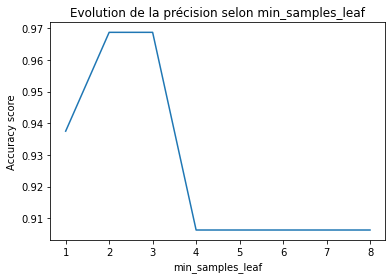

In [59]:
LEAF = np.linspace(1,8,8).astype(int)
abs, ord = [], []
for min_samples_leaf in LEAF:
    rf = RandomForestClassifier(n_jobs=2, min_samples_leaf=min_samples_leaf, random_state=rng_seed)
    rf.fit(train[features], y)
    y_pred = rf.predict(test[features])
    abs.append(min_samples_leaf)
    ord.append(accuracy_score(y_true, y_pred))
plt.plot(abs, ord)
plt.title("Evolution de la précision selon min_samples_leaf")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy score");

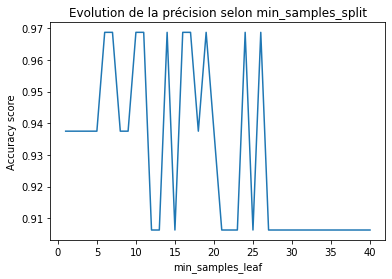

In [ ]:
SPLIT = np.linspace(1,40,40).astype(int)
abs, ord = [], []
for min_samples_split in SPLIT:
    rf = RandomForestClassifier(n_jobs=2, min_samples_split=min_samples_split, random_state=rng_seed)
    rf.fit(train[features], y)
    y_pred = rf.predict(test[features])
    abs.append(min_samples_split)
    ord.append(accuracy_score(y_true, y_pred))
plt.plot(abs, ord)
plt.title("Evolution de la précision selon min_samples_split")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy score");

Après avoir identifié l'effet de chaque hyperparamètre individuellement, on regarde l'effet que chaque combinaison a de manière combinée. Cela prend plus de temps (environ 5min) algorithmiquement parlant mais est censé donner un résultat optimal.

In [76]:
from tqdm import tqdm

DEPTH = np.linspace(2,8,7).astype(int)
LEAF = np.linspace(1,8,8).astype(int)
SPLIT = np.linspace(1,40,40).astype(int)
scores = [0]
for i, max_depth in tqdm(enumerate(DEPTH)) :
    for j, min_samples_leaf in enumerate(LEAF):
        for k, min_samples_split in enumerate(SPLIT):
            rf = RandomForestClassifier(n_jobs=2, max_depth=max_depth, 
                                min_samples_leaf=min_samples_leaf,
                                min_samples_split=min_samples_split, random_state=rng_seed)
            rf.fit(train[features], y)
            y_pred = rf.predict(test[features])
            if accuracy_score(y_true, y_pred) > max(scores):
                best_combination = (max_depth, min_samples_leaf, min_samples_split)
                print(best_combination)
                print(accuracy_score(y_true, y_pred))
            scores.append(accuracy_score(y_true, y_pred))

0it [00:00, ?it/s]

(2, 1, 1)
0.90625
(2, 1, 6)
0.96875


7it [04:50, 41.44s/it]


In [77]:
print("La meilleure combinaison est : ")
print(f"- Max_depth = {best_combination[0]}")
print(f"- Min_samples_leaf = {best_combination[1]}")
print(f"- Min_samples_split = {best_combination[2]}")

La meilleure combinaison est : 
- Max_depth = 2
- Min_samples_leaf = 1
- Min_samples_split = 6


Cette combinaison semble être cohérente avec l'effet individuel des hyperparamètres sur les prédictions dessiné précédemment. Si la profondeur optimale (au regard des autres hyperparamètres) semble être très faible, il faut se rappeler qu'une forêt aléatoire tire sa force du principe de comités experts où elle peut obtenir de très bon résultat à partir d'un vote selon un ensemble d'arbres très simples !

<u>Réponse 4</u> : Pour estimer l'erreur de prédiction on utilise le "out-of-bag error"(OOB error). Le RandomForestClassifier est entraîné en utilisant l'agrégation bootstrap, où chaque nouvel arbre est ajusté à partir d'un échantillon bootstrap des observations d'entraînement $z_i = (x_i, y_i)$. L'erreur out-of-bag (OOB) est l'erreur moyenne pour chaque $z_i$ calculée en utilisant les prédictions des arbres qui ne contiennent pas $z_i$ dans leur échantillon bootstrap respectif (OOB sample). Cela permet d'ajuster et de valider le RandomForestClassifier tout en le formant.

<u>Réponse 5</u> : Lorsque le dataset présente des classes en quantité non équivalentes (comme ça peut être le cas dans la détection de fraudes par exemple) l'algorithme reçoit beaucoup plus d'exemples d'une classe, ce qui l'incite à privilégier cette classe particulière. Il n'apprend pas ce qui rend l'autre classe "différente" et ne parvient pas à comprendre les modèles sous-jacents qui nous permettent de distinguer les classes.

Pour y pallier, on peut :
- Recueillir plus de données sur la classe minoritaire
- Faire du datasampling :
  - Undersampling : On choisit un sous-ensemble du dataset permettant d'avoir les classes représentées de manière équivalentes
  - Oversampling : On crée des observations synthétiques de la classe minoritaire avec des algorithmes comme les VAE (Variational Encoders), SMOTE (Synthetic Minority Over-Sampling Technique), MSMOTE (Modified Synthetic Minority Over-Sampling Technique)
- Utiliser un modèle résistant à la différence de proportions dans les classes
- On peut changer d'approche et regarder un problème comme celui-ci sous la force de la détection d'anomalies pour lequel on peut utiliser un SVM à une classe
- Utiliser des modèles pénalisables


## Step 5: a small example of regression using random forests
Random forest is capable of learning without carefully crafted data transformations. Take the the $f(x) = \sin(x)$ function for example.

Create some fake data and add a little noise.

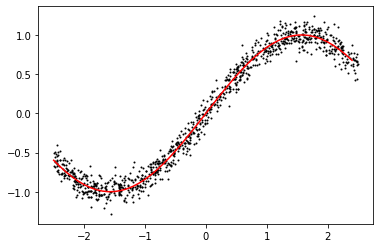

In [79]:
x = np.random.uniform(-2.5, 2.5, 1000)
y = np.sin(x) + np.random.normal(0, .1, 1000)

plt.plot(x,y,'ko',markersize=1,label='data')
plt.plot(np.arange(-2.5,2.5,0.1),np.sin(np.arange(-2.5,2.5,0.1)),'r-',label='ref')
plt.show()

If we try and build a basic linear model to predict y using x we end up with a straight line that sort of bisects the sin(x) function. Whereas if we use a random forest, it does a much better job of approximating the sin(x) curve and we get something that looks much more like the true function.

Based on this example, we will illustrate how the random forest isn't bound by linear constraints.

## Exercise 4
1. Apply random forests on this dataset for regression and compare performances with ordinary least squares regression.
*Note that ordinay least square regression is available thanks to:
from sklearn.linear_model import LinearRegression*

2. Comment on your results.

### Indications:
You may use half of points for training and others to test predictions. Then you will have an idea of how far the random forest predictor fits the sinus curve.

To this aim, you will need to use the model `RandomForestRegressor`. Be careful that when only 1 feature `x` is used as an input, you will need to reshape it by `x.reshape(-1,1)` when using methods `fit` and `predict`.

In [82]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=rng_seed)

### Indication
One clever way to compare models when using `scikit-learn`is to make a loop on models as follows:

In [84]:
models = [LinearRegression(),
          RandomForestClassifier(n_estimators=30, max_depth=4)]

for model in models:
    model.fit(X_train.reshape(-1,1), y_train)
    y_pred = model.predict(X_test.reshape(-1,1))
    print(f"ACC_{model} = ", accuracy_score(y_test, y_pred))

ValueError: continuous is not supported

## Documentation

### Decision trees
http://scikit-learn.org/stable/modules/tree.html

### Random forests
http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

### Plot decision surface : using `plt.contourf`
http://scikit-learn.org/stable/auto_examples/tree/plot_iris.html#sphx-glr-auto-examples-tree-plot-iris-py


## Pruning trees: not available in scikit-learn.
Since post-pruning of tree is not implemented in scikit-learn, you may think of coding your own pruning function. For instance, taking into account the numer of samples per leaf as proposed below:

In [ ]:
# Pruning function (useful ?)
def prune(decisiontree, min_samples_leaf = 1):
    if decisiontree.min_samples_leaf >= min_samples_leaf:
        raise Exception('Tree already more pruned')
    else:
        decisiontree.min_samples_leaf = min_samples_leaf
        tree = decisiontree.tree_
        for i in range(tree.node_count):
            n_samples = tree.n_node_samples[i]
            if n_samples <= min_samples_leaf:
                tree.children_left[i]=-1
                tree.children_right[i]=-1
                